In [44]:
import pandas as pd


# Charger les données RSSI
rssi_1 = pd.read_csv("RSSI_0.csv")
rssi_2 = pd.read_csv("RSSI_1.csv")
rssi_3 = pd.read_csv("RSSI_2.csv")
rssi_4 = pd.read_csv("RSSI_3.csv")

# annalyse de données
print("Carte RSSI 1:")
print(rssi_1.head())

print("\nCarte RSSI 2:")
print(rssi_2.head())

print("\nCarte RSSI 3:")
print(rssi_3.head())

print("\nCarte RSSI 4:")
print(rssi_4.head())



Carte RSSI 1:
         NaN      NaN.1      NaN.2      NaN.3      NaN.4      NaN.5  \
0 -59.725737 -59.565726 -59.402224 -59.235079 -59.090795 -58.915865   
1 -62.864795 -62.707834 -62.499805 -62.334798 -62.166085 -61.993498   
2 -61.294216 -61.135160 -59.394452 -59.226864 -59.055489 -58.880158   
3 -61.393138 -61.234277 -59.492554 -59.325155 -59.153981 -58.978865   
4 -61.463496 -61.305463 -59.559556 -59.392964 -59.222653 -59.048459   

       NaN.6      NaN.7      NaN.8      NaN.9  ...     NaN.41     NaN.42  \
0 -58.736769 -58.553310 -58.365273 -58.172431  ... -40.316714 -38.842864   
1 -61.816860 -61.635980 -61.450656 -61.260668  ... -41.718181 -40.052291   
2 -58.700689 -58.516892 -58.328559 -58.135471  ... -39.664414 -38.781607   
3 -58.799627 -58.616077 -58.428010 -58.235210  ... -39.191853 -38.440780   
4 -58.870209 -58.687720 -58.500794 -58.309222  ... -39.948115 -39.063993   

      NaN.43     NaN.44     NaN.45     NaN.46     NaN.47     NaN.48  \
0 -37.440082 -36.177590 -35.930

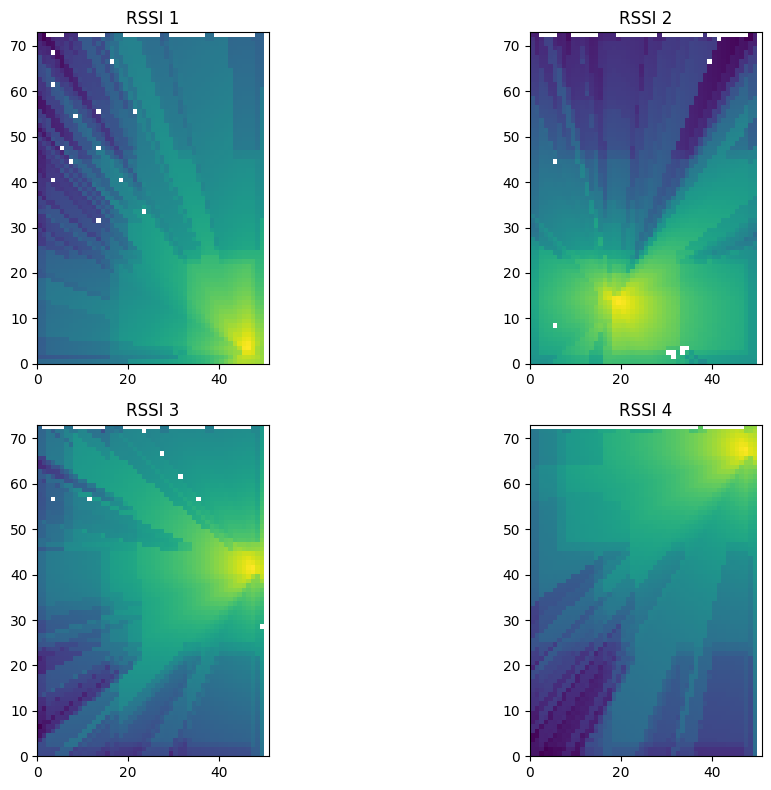

In [45]:
import matplotlib.pyplot as plt

# Afficher les 4 cartes RSSI sur un seul graphique
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rssi_1, cmap='viridis', origin='lower', extent=[0, rssi_1.shape[1], 0, rssi_1.shape[0]])
plt.title('RSSI 1')

plt.subplot(2, 2, 2)
plt.imshow(rssi_2, cmap='viridis', origin='lower', extent=[0, rssi_2.shape[1], 0, rssi_2.shape[0]])
plt.title('RSSI 2')

plt.subplot(2, 2, 3)
plt.imshow(rssi_3, cmap='viridis', origin='lower', extent=[0, rssi_3.shape[1], 0, rssi_3.shape[0]])
plt.title('RSSI 3')

plt.subplot(2, 2, 4)
plt.imshow(rssi_4, cmap='viridis', origin='lower', extent=[0, rssi_4.shape[1], 0, rssi_4.shape[0]])
plt.title('RSSI 4')

plt.tight_layout()
plt.show()


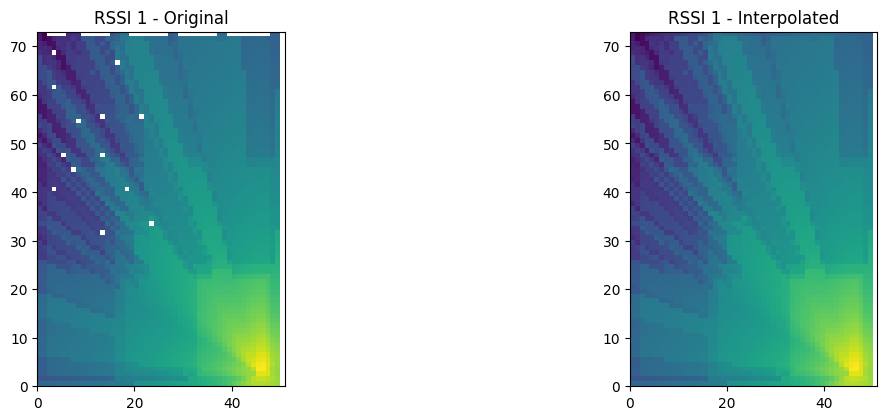

In [3]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Charger les données RSSI
rssi_1 = pd.read_csv("RSSI_0.csv")
rssi_2 = pd.read_csv("RSSI_1.csv")
rssi_3 = pd.read_csv("RSSI_2.csv")
rssi_4 = pd.read_csv("RSSI_3.csv")

# Définir une grille régulière pour l'interpolation
x = np.arange(0, rssi_1.shape[1])
y = np.arange(0, rssi_1.shape[0])

# Créer une fonction pour effectuer l'interpolation
def interpolate_rssi(data):
    x_coords, y_coords = np.meshgrid(x, y)
    coordinates = np.column_stack((x_coords.flatten(), y_coords.flatten()))

    values = data.values.flatten()
    mask = ~np.isnan(values)

    interpolated = griddata(coordinates[mask], values[mask], (x_coords, y_coords), method='linear')

    return interpolated

# Appliquer l'interpolation à chaque carte RSSI
interpolated_rssi_1 = interpolate_rssi(rssi_1)
interpolated_rssi_2 = interpolate_rssi(rssi_2)
interpolated_rssi_3 = interpolate_rssi(rssi_3)
interpolated_rssi_4 = interpolate_rssi(rssi_4)

# Afficher les cartes originales et interpolées
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rssi_1, cmap='viridis', origin='lower', extent=[0, rssi_1.shape[1], 0, rssi_1.shape[0]])
plt.title('RSSI 1 - Original')

plt.subplot(2, 2, 2)
plt.imshow(interpolated_rssi_1, cmap='viridis', origin='lower', extent=[0, rssi_1.shape[1], 0, rssi_1.shape[0]])
plt.title('RSSI 1 - Interpolated')

# Répéter le processus pour les autres cartes RSSI

plt.tight_layout()
plt.show()


In [26]:
import numpy as np

# Générer des données synthétiques
np.random.seed(42)
num_samples = 1000

# Forces du signal (RSSI)
rssi_1 = np.random.normal(-50, 5, num_samples)
rssi_2 = np.random.normal(-60, 5, num_samples)
rssi_3 = np.random.normal(-70, 5, num_samples)
rssi_4 = np.random.normal(-80, 5, num_samples)

# Positions associées (X, Y)
X = np.random.uniform(0, 10, num_samples)
Y = np.random.uniform(0, 10, num_samples)

# Créer l'ensemble d'apprentissage
training_data = np.column_stack((rssi_1, rssi_2, rssi_3, rssi_4, X, Y))

# Afficher quelques lignes de l'ensemble d'apprentissage
print(training_data[:5])


[[-47.51642923 -53.00322282 -73.37589137 -89.53903779   4.85017988
    1.68859289]
 [-50.69132151 -55.37683159 -70.72259335 -84.30192505   0.8540303
    4.60672792]
 [-46.76155731 -59.70184815 -73.9620996  -82.06802767   9.7246139
    3.07087743]
 [-42.38485072 -63.23468389 -71.53980765 -70.56156171   5.18010431
    0.3515925 ]
 [-51.17076687 -56.50888343 -79.46807333 -77.21723438   6.14186244
    3.23145217]]


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construction du modèle
model = Sequential()

# Couche d'entrée
model.add(Dense(32, input_dim=4, activation='relu'))

# Couches cachées
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Couche de sortie
model.add(Dense(2, activation='linear'))  # 2 neurones pour les coordonnées (x, y)

# Compilation du modèle avec la fonction de perte appropriée (Mean Squared Error)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Afficher un résumé du modèle
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                160       
                                                                 
 dense_61 (Dense)            (None, 64)                2112      
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4418 (17.26 KB)
Trainable params: 4418 (17.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
20/20 [==============================] - 2s 14ms/step - loss: 56.2302 - mse: 56.2302 - r2_score_metric: -5.4769 - val_loss: 11.5719 - val_mse: 11.5719 - val_r2_score_metric: -0.3502
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 11.9219 - mse: 11.9219 - r2_score_metric: -0.4141 - val_loss: 9.5150 - val_mse: 9.5150 - val_r2_score_metric: -0.0991
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 8.9853 - mse: 8.9853 - r2_score_metric: -0.0692 - val_loss: 8.8632 - val_mse: 8.8632 - val_r2_score_metric: -0.0249
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 8.7511 - mse: 8.7511 - r2_score_metric: -0.0438 - val_loss: 9.1821 - val_mse: 9.1821 - val_r2_score_metric: -0.0622
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 8.9203 - mse: 8.9203 - r2_score_metric: -0.0918 - val_loss: 8.9360 - val_mse: 8.9360 - val_r2_score_metric: -0.0355
Epoch 6/50
20/20 [==============================] - 0

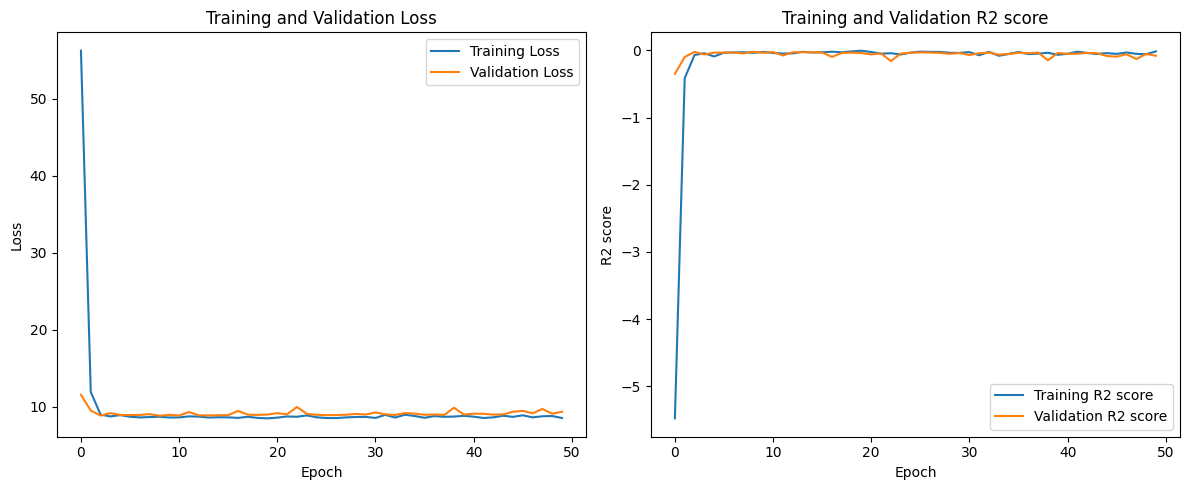

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

import tensorflow as tf

# Définir la fonction de métrique R2 score
def r2_score_metric(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + 1e-8)  # Ajouter une petite valeur epsilon pour éviter la division par zéro



# Supposons que training_data contient vos données d'apprentissage (X_train, y_train)
X_train, y_train = training_data[:, :4], training_data[:, 4:]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Construction du modèle
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))  # 2 neurones pour les coordonnées (x, y)

# Compilation du modèle avec MSE comme fonction de perte et R2 comme métrique
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', r2_score_metric])


# Entraînement du modèle avec R2 score comme métrique supplémentaire
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, mse, r2 = model.evaluate(X_test, y_test)
print(f"Loss on test set: {loss}")
print(f"MSE on test set: {mse}")
print(f"R2 score on test set: {r2}")

# Tracer l'historique de l'évolution de la fonction Loss et du R2 score
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot R2 score
plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score_metric'], label='Training R2 score')
plt.plot(history.history['val_r2_score_metric'], label='Validation R2 score')
plt.title('Training and Validation R2 score')
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()

plt.tight_layout()
plt.show()


7/7 [==============================] - 0s 4ms/step


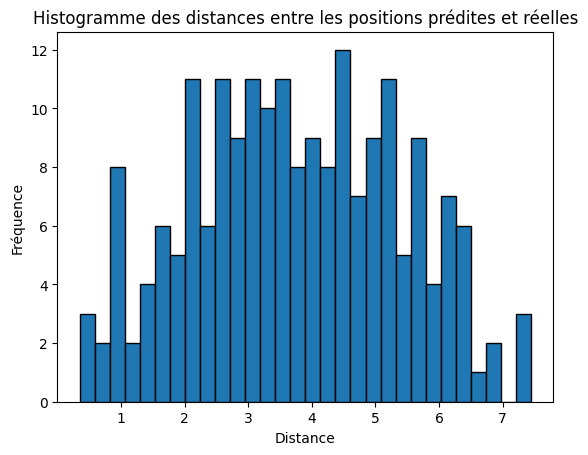

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que model soit votre modèle déjà entraîné et X_test votre ensemble de test

# Obtenir les prédictions du modèle
predictions = model.predict(X_test)

# Calculer les distances entre les positions prédites et réelles
distances = np.sqrt(np.sum((predictions - y_test)**2, axis=1))

# Tracer l'histogramme des distances
plt.hist(distances, bins=30, edgecolor='black')
plt.title('Histogramme des distances entre les positions prédites et réelles')
plt.xlabel('Distance')
plt.ylabel('Fréquence')
plt.show()


# question 7

Pour conclure et évaluer la précision du système de localisation, vous pouvez considérer plusieurs aspects. Voici quelques points à prendre en compte pour tirer des conclusions :

    Analyse des métriques : Examinez les métriques de performance que vous avez utilisées, telles que la perte (loss) et le score R2. Ces métriques fournissent des informations sur la qualité des prédictions du modèle.

    Visualisation des résultats : Analysez visuellement les résultats en comparant les positions prédites avec les positions réelles. Vous pouvez utiliser des graphiques, des cartes de chaleur ou d'autres visualisations pour évaluer la cohérence des prédictions.

    Histogramme des distances : L'histogramme des distances entre les positions prédites et réelles que vous avez tracé précédemment peut également fournir des informations sur la dispersion des erreurs de localisation.

    Comparaison avec des méthodes alternatives : Si possible, comparez les performances de votre modèle avec d'autres méthodes de localisation. Cela pourrait inclure des méthodes classiques de triangulation, des algorithmes de machine learning différents, ou des techniques spécifiques au contexte de votre application.

    Analyse des erreurs : Examinez les cas où le modèle a fait des erreurs significatives. Comprendre les erreurs peut vous donner des indications sur les scénarios ou les conditions difficiles pour votre système.

    Tests supplémentaires : Si le budget et les ressources le permettent, effectuez des tests supplémentaires dans des conditions différentes pour évaluer la robustesse du modèle.

# question 8

Pour améliorer votre modèle de localisation, vous pourriez envisager les stratégies suivantes :

    Augmentation des données : Si possible, collectez davantage de données d'entraînement, en particulier dans des conditions ou des environnements spécifiques où le modèle pourrait avoir du mal à généraliser. L'augmentation des données peut aider le modèle à mieux capturer la variabilité du monde réel.

    Ingénierie des caractéristiques : Explorez des techniques d'ingénierie des caractéristiques pour extraire des informations plus significatives à partir des signaux RSSI. Cela pourrait inclure la création de caractéristiques supplémentaires ou la transformation des caractéristiques existantes pour mieux représenter la relation entre les forces du signal et la position.

    Architecture du modèle : Expérimentez avec différentes architectures de modèles, en ajustant le nombre de couches et de neurones, ainsi que les fonctions d'activation. Vous pourriez également explorer des architectures plus avancées, telles que les réseaux neuronaux récurrents (RNN) ou les réseaux neuronaux convolutifs (CNN), en fonction de la nature de vos données.

    Optimisation des hyperparamètres : Utilisez des techniques d'optimisation des hyperparamètres pour trouver la combinaison optimale de paramètres tels que le taux d'apprentissage, le nombre d'époques, etc. Cela peut être réalisé à l'aide de méthodes manuelles, de recherche aléatoire ou d'optimisation bayésienne.

    Ensemble de modèles : Explorez la possibilité de créer un ensemble de modèles (par exemple, un vote majoritaire) en utilisant plusieurs modèles formés avec différentes initialisations ou architectures. Cela peut améliorer la robustesse du modèle.

    Regularization : Ajoutez des techniques de régularisation telles que la régularisation L1 ou L2 pour éviter le surajustement du modèle aux données d'entraînement.

    Optimisation de la métrique R2 : Puisque vous utilisez le score R2 comme métrique, assurez-vous de l'optimiser correctement pendant l'entraînement. Vous pourriez avoir besoin d'ajuster la fonction de perte ou d'explorer des méthodes spécifiques pour optimiser le R2.

    Validation croisée : Utilisez la validation croisée pour évaluer la performance du modèle de manière plus robuste et réduire les biais liés à la division entre l'ensemble d'apprentissage et l'ensemble de test.

En implémentant ces stratégies, vous pourrez itérer sur votre modèle et potentiellement améliorer sa précision et sa généralisation.